K-Nearest Neighbors (KNN) 

**Problem Statement**

Big Mart Sales Data

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store. Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
# from sklearn.metrics import accuracy_score,
from sklearn import metrics 
from math import sqrt

In [29]:
df = pd.read_csv("bigmartsales.csv")

In [30]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## EDA

In [31]:
df.shape

(8523, 12)

In [32]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [33]:
mean = df['Item_Weight'].mean()
print('mean of Item Weight', mean)
df['Item_Weight'].fillna(mean, inplace = True)

mean of Item Weight 12.857645184135976


C:\Users\VISHAL\AppData\Local\Temp\ipykernel_9452\3767629949.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Item_Weight'].fillna(mean, inplace = True)


In [34]:
df.Outlet_Size.unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [35]:
df.Outlet_Size.value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [36]:
mode = df['Outlet_Size'].mode()
print('Outlet size mode', mode)
df['Outlet_Size'].fillna(mode[0], inplace = True)

Outlet size mode 0    Medium
Name: Outlet_Size, dtype: object


C:\Users\VISHAL\AppData\Local\Temp\ipykernel_9452\1718475037.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Outlet_Size'].fillna(mode[0], inplace = True)


In [37]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [38]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [39]:
df.drop(['Item_Identifier','Outlet_Identifier'], axis = 1, inplace = True)
df.shape

(8523, 10)

In [40]:
df.Item_Fat_Content.value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [41]:
df['Item_Fat_Content'].replace('LF','Low Fat', inplace = True)

C:\Users\VISHAL\AppData\Local\Temp\ipykernel_9452\990567510.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Item_Fat_Content'].replace('LF','Low Fat', inplace = True)


In [42]:
df.Item_Fat_Content.value_counts()

Item_Fat_Content
Low Fat    5405
Regular    2889
reg         117
low fat     112
Name: count, dtype: int64

In [43]:
df['Item_Fat_Content'].replace('low fat','Low Fat', inplace = True)
df['Item_Fat_Content'].replace('reg','Regular', inplace = True)

C:\Users\VISHAL\AppData\Local\Temp\ipykernel_9452\2411933071.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Item_Fat_Content'].replace('low fat','Low Fat', inplace = True)
C:\Users\VISHAL\AppData\Local\Temp\ipykernel_9452\2411933071.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves 

In [44]:
df.Item_Fat_Content.value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [45]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [46]:
df.shape

(8523, 10)

In [47]:
df = pd.get_dummies(df)

In [48]:
df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,True,False,False,False,False,...,False,True,False,True,False,False,False,True,False,False
1,5.92,0.019278,48.2692,2009,443.4228,False,True,False,False,False,...,False,True,False,False,False,True,False,False,True,False
2,17.50,0.016760,141.6180,1999,2097.2700,True,False,False,False,False,...,False,True,False,True,False,False,False,True,False,False
3,19.20,0.000000,182.0950,1998,732.3800,False,True,False,False,False,...,False,True,False,False,False,True,True,False,False,False
4,8.93,0.000000,53.8614,1987,994.7052,True,False,False,False,False,...,True,False,False,False,False,True,False,True,False,False


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 33 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      8523 non-null   float64
 1   Item_Visibility                  8523 non-null   float64
 2   Item_MRP                         8523 non-null   float64
 3   Outlet_Establishment_Year        8523 non-null   int64  
 4   Item_Outlet_Sales                8523 non-null   float64
 5   Item_Fat_Content_Low Fat         8523 non-null   bool   
 6   Item_Fat_Content_Regular         8523 non-null   bool   
 7   Item_Type_Baking Goods           8523 non-null   bool   
 8   Item_Type_Breads                 8523 non-null   bool   
 9   Item_Type_Breakfast              8523 non-null   bool   
 10  Item_Type_Canned                 8523 non-null   bool   
 11  Item_Type_Dairy                  8523 non-null   bool   
 12  Item_Type_Frozen Foo

In [50]:
df.shape

(8523, 33)

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
x = df.drop('Item_Outlet_Sales', axis = 1)
x.shape

(8523, 32)

In [53]:
y = df['Item_Outlet_Sales']
y.shape

(8523,)

In [54]:
x.shape

(8523, 32)

### Test-train split

In [55]:
x_train, x_test, y_train, y_test = train_test_split (x,y, test_size = 0.3)

In [56]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5966, 32)
(2557, 32)
(5966,)
(2557,)


### Feature Scaling


**Standarisation Method MinMaxScaler**

X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
X_scaled = X_std * (max - min) + min

where min, max = feature_range.

In [57]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

In [58]:
x_train.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
1398,6.215000,0.049580,227.4062,1987,False,True,True,False,False,False,...,True,False,False,False,False,True,False,True,False,False
7238,12.857645,0.008903,120.9756,1985,True,False,False,False,False,False,...,False,True,False,False,False,True,False,False,False,True
5098,7.325000,0.093914,93.2146,2007,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
505,9.195000,0.000000,43.6744,2009,True,False,True,False,False,False,...,False,True,False,False,False,True,False,False,True,False
652,16.750000,0.008208,102.8674,2002,False,True,False,False,False,True,...,False,True,False,False,True,False,False,True,False,False


### Model fit and training

In [61]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics 
from math import sqrt

In [62]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = KNeighborsRegressor(n_neighbors = K)
    model.fit(x_train, y_train)  #fit the model
    y_pred=model.predict(x_test) #make prediction on test set
    error = sqrt(metrics.mean_squared_error(y_test,y_pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 1510.6227865548299
RMSE value for k=  2 is: 1323.2993001551756
RMSE value for k=  3 is: 1265.4978021374927
RMSE value for k=  4 is: 1228.3455897390868
RMSE value for k=  5 is: 1214.9278385162704
RMSE value for k=  6 is: 1215.885770212133
RMSE value for k=  7 is: 1218.0776392519454
RMSE value for k=  8 is: 1219.8707335229903
RMSE value for k=  9 is: 1217.279569777018
RMSE value for k=  10 is: 1224.3564506121766
RMSE value for k=  11 is: 1232.7742979663649
RMSE value for k=  12 is: 1240.440789002582
RMSE value for k=  13 is: 1247.3932266572817
RMSE value for k=  14 is: 1251.8622886408052
RMSE value for k=  15 is: 1257.8771704334501
RMSE value for k=  16 is: 1267.5443442691142
RMSE value for k=  17 is: 1272.0415232588311
RMSE value for k=  18 is: 1278.2832809950319
RMSE value for k=  19 is: 1283.116714669618
RMSE value for k=  20 is: 1286.241409813516


In [63]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

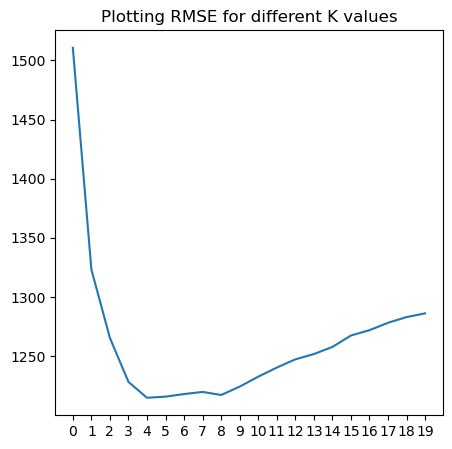

In [64]:
curve = pd.DataFrame(rmse_val) #elbow curve 
ax = curve.plot(kind = 'line',figsize=(5,5), title = "Plotting RMSE for different K values", legend =  False)
ax.set_xticks(range(0,20,1))

#### RMSE FOR K = 9

In [65]:
final_model = KNeighborsRegressor(n_neighbors = 7)
final_model.fit(x_train, y_train)  #fit the model
    
y_pred= final_model.predict(x_test) 

In [66]:
data = {'y_Actual':    y_test,
        'y_Predicted': y_pred
        }

df_check = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
df_check.head()

,y_Actual,y_Predicted
2983,4910.2750,3041.279286
8283,1845.5976,1494.530771
3924,1896.1984,3358.009857
706,97.2068,935.924571
3603,330.2368,1788.624143


### Evaluation

In [67]:
print("R-squared value of this fit:",round(metrics.r2_score(y_test,y_pred),3))

R-squared value of this fit: 0.46


In [68]:
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test,y_pred))
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,y_pred))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean absolute error (MAE): 877.9747142521928
Mean square error (MSE): 1483713.1352455923
Root mean square error (RMSE): 1218.0776392519454
